# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(412)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_num_cities = len(cities)
total_num_cities

582

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up configuration
open_weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{open_weather_url}appid={weather_api_key}&units={units}&q="

# Test Connection
response = requests.get(query_url + 'Atlanta').json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 33.75, 'lon': -84.39},
 'dt': 1586706040,
 'id': 4180439,
 'main': {'feels_like': 53.2,
          'humidity': 77,
          'pressure': 1015,
          'temp': 58.05,
          'temp_max': 61,
          'temp_min': 53.01},
 'name': 'Atlanta',
 'rain': {'1h': 0.25},
 'sys': {'country': 'US',
         'id': 4155,
         'sunrise': 1586689786,
         'sunset': 1586736369,
         'type': 1},
 'timezone': -14400,
 'visibility': 16093,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 120, 'speed': 9.17}}


In [4]:
# Call Each City's Weather Data and store everything into a dictionary

city_weather_data = {}

city_num = 0

for city in range(0, total_num_cities):
    
    city_name = cities[city]
    response  = requests.get(query_url + city_name).json()
    city_weather_data[city_name] = response
    
    print(city + 1, ' : ', city_name, ' data downloaded.', 'progress:', (city + 1), '/', total_num_cities)
    

    

1  :  talnakh  data downloaded. progress: 1 / 582
2  :  pangnirtung  data downloaded. progress: 2 / 582
3  :  mataura  data downloaded. progress: 3 / 582
4  :  hilo  data downloaded. progress: 4 / 582
5  :  busselton  data downloaded. progress: 5 / 582
6  :  atuona  data downloaded. progress: 6 / 582
7  :  hereford  data downloaded. progress: 7 / 582
8  :  castro  data downloaded. progress: 8 / 582
9  :  sur  data downloaded. progress: 9 / 582
10  :  aitape  data downloaded. progress: 10 / 582
11  :  puerto ayora  data downloaded. progress: 11 / 582
12  :  faanui  data downloaded. progress: 12 / 582
13  :  dingle  data downloaded. progress: 13 / 582
14  :  kentau  data downloaded. progress: 14 / 582
15  :  kununurra  data downloaded. progress: 15 / 582
16  :  sao gabriel da cachoeira  data downloaded. progress: 16 / 582
17  :  chokurdakh  data downloaded. progress: 17 / 582
18  :  new norfolk  data downloaded. progress: 18 / 582
19  :  berdigestyakh  data downloaded. progress: 19 / 582

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Save downloaded weather data as a txt file
with open('city_weather_data.txt', 'w') as file:
     file.write(json.dumps(city_weather_data))

In [17]:
# Compile data needed
good_city = [] # List of city with data
bad_city  = [] # List of city without data 
iso   = [] # CountryISO
lat   = [] # Latitude
lon   = [] # longitude
temp  = [] # Temperature
humi  = [] # Humidity
cloud = [] # Cloudiness
wind  = [] # Wind Speed

In [18]:
for city in cities:
    # Check whether the data is available or not.
    if city_weather_data[city]['cod'] == '404':
        #print(city, ' 404 error. city not found.')
        bad_city.append(city)
    else:
        good_city.append(city)
        iso.append(city_weather_data[city]['sys']['country'])
        lat.append(city_weather_data[city]['coord']['lat'])
        lon.append(city_weather_data[city]['coord']['lon'])
        temp.append(city_weather_data[city]['main']['temp'])
        humi.append(city_weather_data[city]['main']['humidity'])
        cloud.append(city_weather_data[city]['clouds']['all'])
        wind.append(city_weather_data[city]['wind']['speed'])
    
# create a dictionary
city_data_dict = {
    'city'       : good_city,
    'country'    : iso,
    'latitude'   : lat,
    'longitude'  : lon,
    'temperature': temp,
    'humidity'   : humi,
    'cloudiness' : cloud,
    'windspeed'  : wind
}

# Create DataFrame
weather_df = pd.DataFrame(city_data_dict)
weather_df.head()

sindand  404 error. city not found.
sinkat  404 error. city not found.
barentsburg  404 error. city not found.
illoqqortoormiut  404 error. city not found.
saleaula  404 error. city not found.
tsihombe  404 error. city not found.
wolmaranstad  404 error. city not found.
tumannyy  404 error. city not found.
taolanaro  404 error. city not found.
ksenyevka  404 error. city not found.
amderma  404 error. city not found.
grand river south east  404 error. city not found.
belushya guba  404 error. city not found.
chagda  404 error. city not found.
zhanatas  404 error. city not found.
mys shmidta  404 error. city not found.
bolungarvik  404 error. city not found.
marcona  404 error. city not found.
hihifo  404 error. city not found.
cockburn harbour  404 error. city not found.
volkermarkt  404 error. city not found.
sentyabrskiy  404 error. city not found.
xadani  404 error. city not found.
juifang  404 error. city not found.
tabiauea  404 error. city not found.
lemesos  404 error. city not f

,city,country,latitude,longitude,temperature,humidity,cloudiness,windspeed
0,talnakh,RU,69.49,88.40,14.00,92,66,4.47
1,pangnirtung,CA,66.15,-65.71,27.30,91,100,6.38
2,mataura,NZ,-46.19,168.86,46.99,89,100,14.00
3,hilo,US,19.73,-155.09,63.70,73,20,4.70
4,busselton,AU,-33.65,115.33,65.35,62,96,11.01


In [21]:
weather_df.to_csv('weather_df.csv', index = False)

In [22]:
# Check new number of data
weather_df.shape

(533, 8)

In [24]:
# Sort Data by Latitude
weather_df = weather_df.sort_values('latitude')
weather_df = weather_df.reset_index(drop = True)
weather_df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,windspeed
0,ushuaia,AR,-54.80,-68.30,42.80,87,75,11.41
1,punta arenas,CL,-53.15,-70.92,48.09,76,40,17.22
2,rio gallegos,AR,-51.62,-69.22,51.80,57,90,16.11
3,bluff,NZ,-46.60,168.33,46.99,90,100,10.00
4,kaitangata,NZ,-46.28,169.85,48.00,84,90,3.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

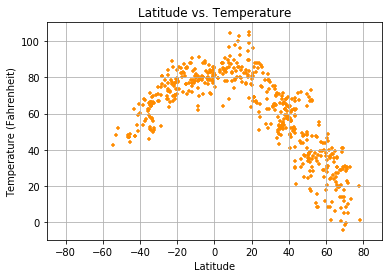

In [97]:
weather_df.plot(kind = 'scatter', x = 'latitude', y = 'temperature', marker = '+', color = 'darkorange')
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Fahrenheit)')
plt.grid()
plt.xlim(-90, 90)
plt.savefig('Latitude vs. Temperature.png')
plt.show()


#### Latitude vs. Humidity Plot

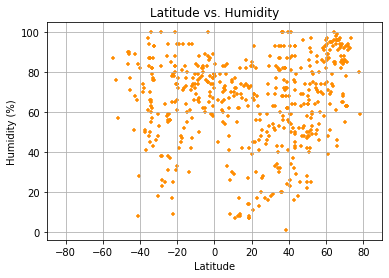

In [98]:
weather_df.plot(kind = 'scatter', x = 'latitude', y = 'humidity', marker = '+', color = 'darkorange')
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.xlim(-90, 90)
plt.savefig('Latitude vs. Humidity.png')
plt.show()


#### Latitude vs. Cloudiness Plot

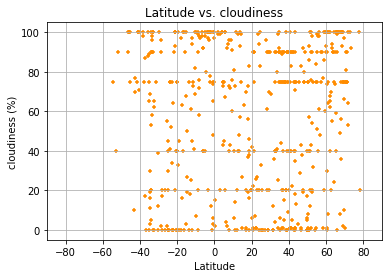

In [99]:
weather_df.plot(kind = 'scatter', x = 'latitude', y = 'cloudiness', marker = '+', color = 'darkorange')
plt.title('Latitude vs. cloudiness')
plt.xlabel('Latitude')
plt.ylabel('cloudiness (%)')
plt.grid()
plt.xlim(-90, 90)
plt.savefig('Latitude vs. cloudiness.png')
plt.show()


#### Latitude vs. Wind Speed Plot

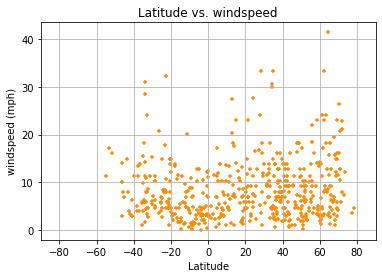

In [100]:
weather_df.plot(kind = 'scatter', x = 'latitude', y = 'windspeed', marker = '+', color = 'darkorange')
plt.title('Latitude vs. windspeed')
plt.xlabel('Latitude')
plt.ylabel('windspeed (mph)')
plt.grid()
plt.xlim(-90, 90)
plt.savefig('Latitude vs. windspeed.png')
plt.show()


## Linear Regression

In [110]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(df, y_col_name):

    x = df['latitude']
    y = df[y_col_name]
    
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    lr_output = (x * slope) + intercept
    
    unit_dict = {
        'temperature' : '(Fahrenheit)',
        'humidity'    : '%',
        'cloudiness'  : '%',
        'windspeed'   : 'mph',
    }
    
    plt.scatter(x, y, marker = '+', color = 'darkorange')
    plt.plot(x, lr_output, color = 'black')
    
    plt.title('Latitude vs. ' + y_col_name)
    plt.xlabel('Latitude')
    plt.ylabel(y_col_name + ' ' + unit_dict[y_col_name])
    plt.grid()
    plt.xlim(-90, 90)

    return slope, intercept, rvalue, pvalue, stderr

(-0.41691765416424836,
 68.18181721962053,
 -0.6290253696712563,
 4.6453237269601787e-60,
 0.022359953322727617)

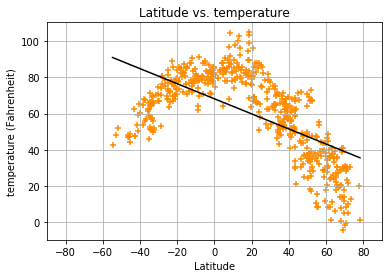

In [111]:
# Test
plot_linear_regression(weather_df, 'temperature')

In [112]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = weather_df.loc[weather_df.latitude >= 0].copy()
south_hemi = weather_df.loc[weather_df.latitude <= 0].copy()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation =  -0.88
R^2 =  0.78
p_value =  0.0


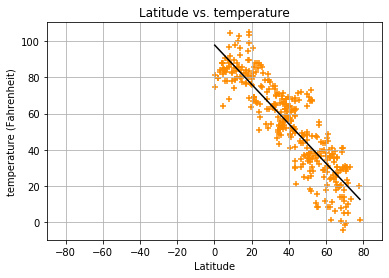

In [114]:
stat = plot_linear_regression(north_hemi, 'temperature')

r_squre = round(stat[2] ** 2, 2)
p_value = round(stat[3], 2)

print('Correlation = ', round(stat[2], 2))
print('R^2 = ', r_squre)
print('p_value = ', p_value)
plt.savefig('Latitude vs. temperature - north.png')
plt.show()

AW Comment: In the northern hemisphere, latitude and and temperature are strong negatively correlated with a correlation of coefficent
of -0.88. The linear reqression result is significant with a p-valuse almost at 0 with a R-square at 0.78.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation =  0.79
R^2 =  0.63
p_value =  0.0


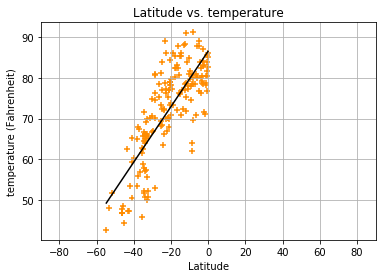

In [115]:
stat = plot_linear_regression(south_hemi, 'temperature')

r_squre = round(stat[2] ** 2, 2)
p_value = round(stat[3], 2)

print('Correlation = ', round(stat[2], 2))
print('R^2 = ', r_squre)
print('p_value = ', p_value)
plt.savefig('Latitude vs. temperature - south.png')
plt.show()

AW Comment: In the souther hemisphere, latitude and and temperature are strong positively correlated with a correlation of coefficent of 0.79. The linear reqression model is significant with a p-valuse almost at 0 with a R-square at 0.63.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation =  0.35
R^2 =  0.12
p_value =  0.0


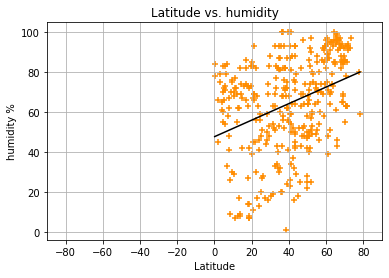

In [116]:
stat = plot_linear_regression(north_hemi, 'humidity')

r_squre = round(stat[2] ** 2, 2)
p_value = round(stat[3], 2)

print('Correlation = ', round(stat[2], 2))
print('R^2 = ', r_squre)
print('p_value = ', p_value)
plt.savefig('Latitude vs. humidity - north.png')
plt.show()

AW Comment: In the northern hemisphere, the correlation between latitude and humidity is weak at 0.35. The linear regression is not effective using latitude to predict humidity given the R-square is only 0.12.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation =  0.11
R^2 =  0.01
p_value =  0.15


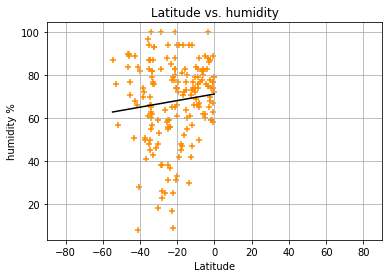

In [117]:
stat = plot_linear_regression(south_hemi, 'humidity')

r_squre = round(stat[2] ** 2, 2)
p_value = round(stat[3], 2)

print('Correlation = ', round(stat[2], 2))
print('R^2 = ', r_squre)
print('p_value = ', p_value)
plt.savefig('Latitude vs. humidity - south.png')
plt.show()

AW Comment: In the southern hemisphere, the correlation between latitude and humidity is weak at 0.11. The linear regression is not siginifant given the high p-value at 0.15.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation =  0.18
R^2 =  0.03
p_value =  0.0


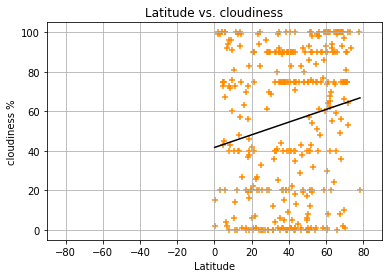

In [118]:
stat = plot_linear_regression(north_hemi, 'cloudiness')

r_squre = round(stat[2] ** 2, 2)
p_value = round(stat[3], 2)

print('Correlation = ', round(stat[2], 2))
print('R^2 = ', r_squre)
print('p_value = ', p_value)
plt.savefig('Latitude vs. cloudiness - north.png')
plt.show()

AW Comment: In the northern hemisphere, the correlation between latitude and cloudiness is very weak at 0.18. The linear regression is not effective using latitude to predict cloudiness given the R-square is only 0.03.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation =  0.05
R^2 =  0.0
p_value =  0.52


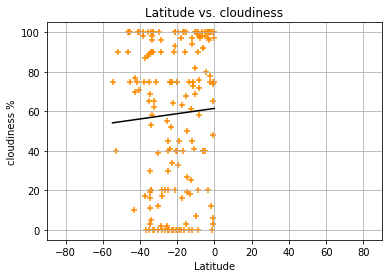

In [119]:
stat = plot_linear_regression(south_hemi, 'cloudiness')

r_squre = round(stat[2] ** 2, 2)
p_value = round(stat[3], 2)

print('Correlation = ', round(stat[2], 2))
print('R^2 = ', r_squre)
print('p_value = ', p_value)
plt.savefig('Latitude vs. cloudiness - south.png')
plt.show()

AW Comment: In the southern hemisphere, the correlation between latitude and cloudiness is very weak at 0.05. The linear regression is not siginifant given the high p-value at 0.52.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation =  0.1
R^2 =  0.01
p_value =  0.07


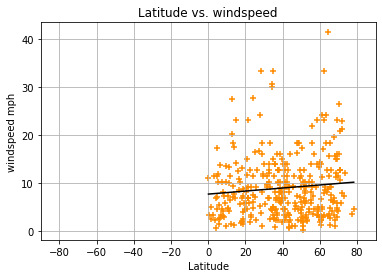

In [120]:
stat = plot_linear_regression(north_hemi, 'windspeed')

r_squre = round(stat[2] ** 2, 2)
p_value = round(stat[3], 2)

print('Correlation = ', round(stat[2], 2))
print('R^2 = ', r_squre)
print('p_value = ', p_value)
plt.savefig('Latitude vs. windspeed - north.png')
plt.show()

AW Comment: Latitude is not useful to predict wind speed. The p-value is high and R^2 is extremely low.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation =  -0.29
R^2 =  0.08
p_value =  0.0


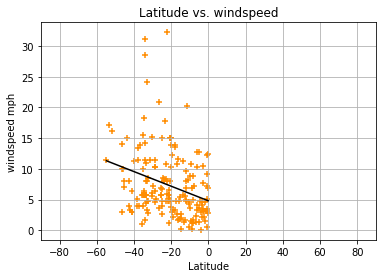

In [121]:
stat = plot_linear_regression(south_hemi, 'windspeed')

r_squre = round(stat[2] ** 2, 2)
p_value = round(stat[3], 2)

print('Correlation = ', round(stat[2], 2))
print('R^2 = ', r_squre)
print('p_value = ', p_value)
plt.savefig('Latitude vs. windspeed - south.png')
plt.show()

AW Comment: In the southern hemisphere, latitude bears no obvious relaitonship with the wind speed. Latitude alone can only explain 0.08 in variance.